Make sure to have yfinance installed:

In [2]:
try:
    import yfinance
except:
    !pip install yfinance
    import yfinance
import pandas as pd
yfinance.__version__

'0.2.66'

This is the code block that downloads all the data from yfinance. In the case that you want to add another stock for analysis, make a new df using the same format as the ones presented with the stock ticker and add it to the for loop to clean the data:

In [47]:
import pandas as pd

start_date = '2019-01-01'
end_date = '2020-12-31'

# Download stock data for multiple companies
SPY_df = yfinance.download('SPY', start_date, end_date, multi_level_index = False)
WMT_df = yfinance.download('WMT', start_date, end_date, multi_level_index = False)
BKNG_df = yfinance.download('BKNG', start_date, end_date, multi_level_index = False)
PFE_df = yfinance.download('PFE', start_date, end_date, multi_level_index = False)
MCD_df = yfinance.download('MCD', start_date, end_date, multi_level_index = False)
CMG_df = yfinance.download('CMG', start_date, end_date, multi_level_index = False)
DIS_df = yfinance.download('DIS', start_date, end_date, multi_level_index = False)
APPL_df = yfinance.download('AAPL', start_date, end_date, multi_level_index = False)
XOM_df = yfinance.download('XOM', start_date, end_date, multi_level_index = False)

for df in (SPY_df, WMT_df, BKNG_df, PFE_df, MCD_df, CMG_df, DIS_df, APPL_df, XOM_df):
    df["Volatility"] = (df["High"] - df["Low"])      # daily range in price
    df.drop(columns=["Open", "Close"], inplace=True, errors='ignore') # get rid of unnedded columns  

/var/folders/ry/qgjrxzwd2gn6_xhqyhyphb1m0000gn/T/ipykernel_4408/443345102.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  SPY_df = yfinance.download('SPY', start_date, end_date, multi_level_index = False)
[*********************100%***********************]  1 of 1 completed
/var/folders/ry/qgjrxzwd2gn6_xhqyhyphb1m0000gn/T/ipykernel_4408/443345102.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  WMT_df = yfinance.download('WMT', start_date, end_date, multi_level_index = False)
[*********************100%***********************]  1 of 1 completed
/var/folders/ry/qgjrxzwd2gn6_xhqyhyphb1m0000gn/T/ipykernel_4408/443345102.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  BKNG_df = yfinance.download('BKNG', start_date, end_date, multi_level_index = False)
[*********************100%***********************]  1 of 1 completed
/var/folders/ry/qgjrxzwd2gn6_xhqyhyphb1m0000gn/T/ipykernel_440

After running the previous block, save all the data to a .csv. In the case that you add another stock for analysis, use the add the .to_csv() function after cleaning the data to this code block and run it:

In [48]:
# Save dataframes to CSV files
SPY_df.to_csv('SPY_data.csv')
WMT_df.to_csv('WMT_data.csv')
BKNG_df.to_csv('BKNG_data.csv')
PFE_df.to_csv('PFE_data.csv')
MCD_df.to_csv('MCD_data.csv')
CMG_df.to_csv('CMG_data.csv')
DIS_df.to_csv('DIS_data.csv')
APPL_df.to_csv('APPL_data.csv')
XOM_df.to_csv('XOM_data.csv')

This code block allows you to change what stock and value you want to test for in the next few code blocks using k-means clustering and anomaly detection. For "chosen_data" you can put the ticker of any previously downloaded stock data, and for "chosen_metric" you can either choose Volatility or Volume.

In [42]:
# Specify chosen data and metric
chosen_data = 'XOM'
chosen_metric = 'Volatility'

# K = 2 Test with top 5 anomalies (next two code cells)

In [43]:
from sklearn.cluster import KMeans
import numpy 

data_df = pd.read_csv(f'{chosen_data}_data.csv', index_col=0)

kmeans_model = KMeans(n_clusters=2, random_state=0, n_init=1)
kmeans_model.fit(data_df[[chosen_metric]].to_numpy())

center = kmeans_model.cluster_centers_

print(center)

[[0.7807623 ]
 [2.06617804]]


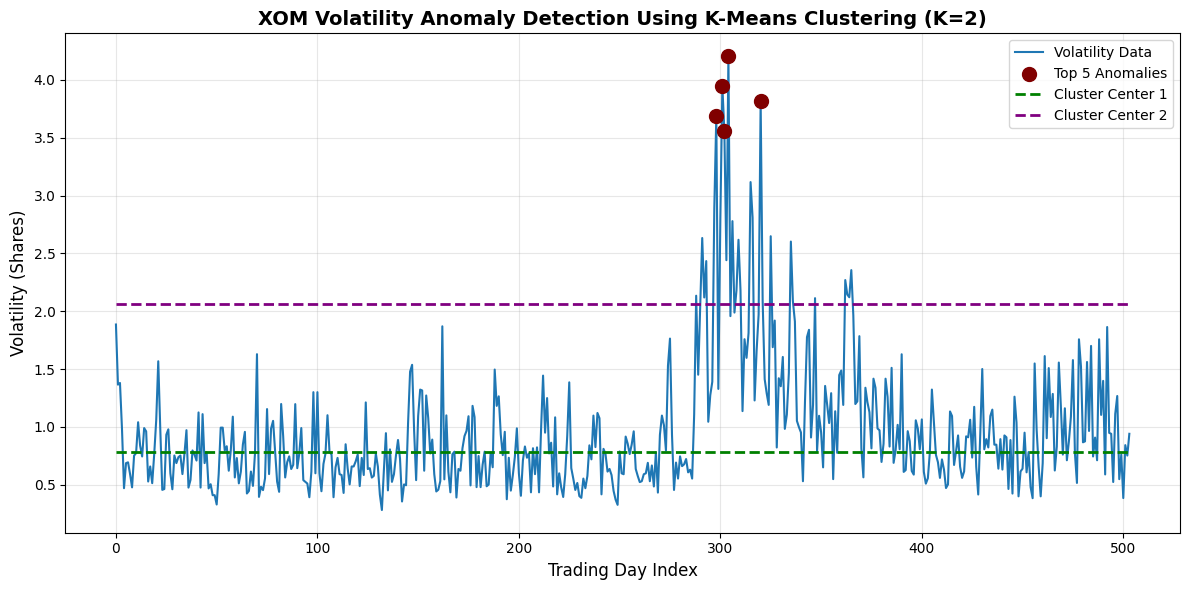

In [44]:
# we are trying to find out indices of volume values that are too far from either of the centers
from math import sqrt
from matplotlib import pyplot

index = 0
distance_data = {}

for k in data_df[chosen_metric]:
    distance1 = sqrt((k - center[0][0])**2)
    distance2 = sqrt((k - center[1][0])**2)
    sum_distance = distance1+distance2
    distance_data[index] = sum_distance
    index=index+1

# Sort the dictionary by value
top_5_X = []
top_5_Y = []

for point in sorted(distance_data,key=distance_data.get,reverse=True):
    top_5_X.append(point)
    top_5_Y.append(data_df[chosen_metric].iloc[point])

#Take the top 5 values as anomalous and plot them

# First plot the original data
pyplot.figure(figsize=(12, 6))
pyplot.plot(range(len(data_df[chosen_metric])), data_df[chosen_metric], label=f'{chosen_metric} Data', linewidth=1.5)

# Then add a layer scatter plotting the anomalous points
pyplot.scatter(top_5_X[:5],top_5_Y[:5],color="maroon", s=100, label='Top 5 Anomalies', zorder=5)

pyplot.plot(range(len(data_df)), [center[0][0]]*len(data_df), color = "green", label='Cluster Center 1', linestyle='--', linewidth=2)
pyplot.plot(range(len(data_df)), [center[1][0]]*len(data_df), color = "purple", label='Cluster Center 2', linestyle='--', linewidth=2)

pyplot.title(f'{chosen_data} {chosen_metric} Anomaly Detection Using K-Means Clustering (K=2)', fontsize=14, fontweight='bold')
pyplot.xlabel('Trading Day Index', fontsize=12)
pyplot.ylabel(f'{chosen_metric} (Shares)', fontsize=12)
pyplot.legend(loc='best', fontsize=10)
pyplot.grid(True, alpha=0.3)
pyplot.tight_layout()
pyplot.show()



# K = 5 Test with 5 anomalies (next two code cells)

In [45]:
from sklearn.cluster import KMeans
import numpy 

data_df = pd.read_csv(f'{chosen_data}_data.csv', index_col=0)

kmeans_model = KMeans(n_clusters=5, random_state=0, n_init=1)
kmeans_model.fit(data_df[[chosen_metric]].to_numpy())

center = kmeans_model.cluster_centers_

print(center)

[[0.97073951]
 [2.292808  ]
 [0.58460012]
 [1.49593185]
 [3.72221347]]


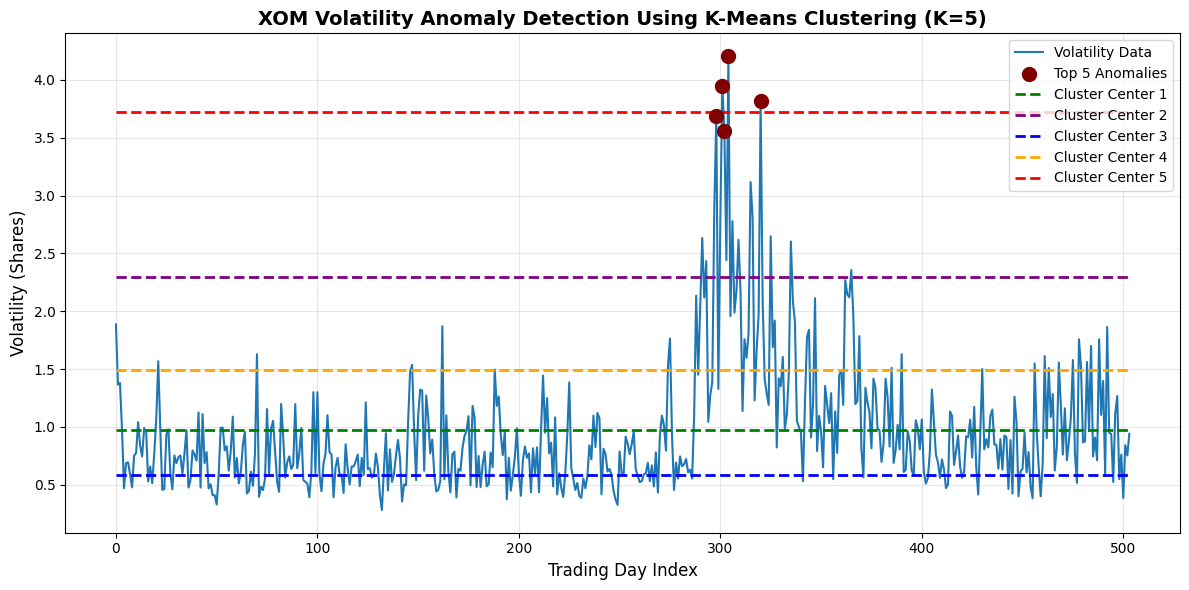

In [46]:
# we are trying to find out indices of volume values that are too far from any of the centers
from math import sqrt
from matplotlib import pyplot

index = 0
distance_data = {}

for k in data_df[chosen_metric]:
    distance1 = sqrt((k - center[0][0])**2)
    distance2 = sqrt((k - center[1][0])**2)
    distance3 = sqrt((k - center[2][0])**2)
    distance4 = sqrt((k - center[3][0])**2)
    distance5 = sqrt((k - center[4][0])**2)
    sum_distance = distance1 + distance2 + distance3 + distance4 + distance5
    distance_data[index] = sum_distance
    index=index+1

# Sort the dictionary by value
top_5_X = []
top_5_Y = []

for point in sorted(distance_data,key=distance_data.get,reverse=True):
    top_5_X.append(point)
    top_5_Y.append(data_df[chosen_metric].iloc[point])

#Take the top 5 values as anomalous and plot them

# First plot the original data
pyplot.figure(figsize=(12, 6))
pyplot.plot(range(len(data_df[chosen_metric])), data_df[chosen_metric], label=f'{chosen_metric} Data', linewidth=1.5)

# Then add a layer scatter plotting the anomalous points
pyplot.scatter(top_5_X[:5],top_5_Y[:5],color="maroon", s=100, label='Top 5 Anomalies', zorder=5)

# Plot all 5 cluster centers
pyplot.plot(range(len(data_df)), [center[0][0]]*len(data_df), color = "green", label='Cluster Center 1', linestyle='--', linewidth=2)
pyplot.plot(range(len(data_df)), [center[1][0]]*len(data_df), color = "purple", label='Cluster Center 2', linestyle='--', linewidth=2)
pyplot.plot(range(len(data_df)), [center[2][0]]*len(data_df), color = "blue", label='Cluster Center 3', linestyle='--', linewidth=2)
pyplot.plot(range(len(data_df)), [center[3][0]]*len(data_df), color = "orange", label='Cluster Center 4', linestyle='--', linewidth=2)
pyplot.plot(range(len(data_df)), [center[4][0]]*len(data_df), color = "red", label='Cluster Center 5', linestyle='--', linewidth=2)

pyplot.title(f'{chosen_data} {chosen_metric} Anomaly Detection Using K-Means Clustering (K=5)', fontsize=14, fontweight='bold')
pyplot.xlabel('Trading Day Index', fontsize=12)
pyplot.ylabel(f'{chosen_metric} (Shares)', fontsize=12)
pyplot.legend(loc='best', fontsize=10)
pyplot.grid(True, alpha=0.3)
pyplot.tight_layout()
pyplot.show()

